# SMOTE Implementation
This notebook demonstrates how to use SMOTE (Synthetic Minority Over-sampling Technique) to balance a dataset.

## Import Libraries
First, we import the necessary libraries.

In [27]:
import pandas as pd
from imblearn.over_sampling import SMOTE


df = pd.read_csv('training_data.csv')

## Separate Features and Target Variable
Next, we separate the features and the target variable from the dataset.

In [28]:
# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target variable into a new dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['y'] = y_resampled

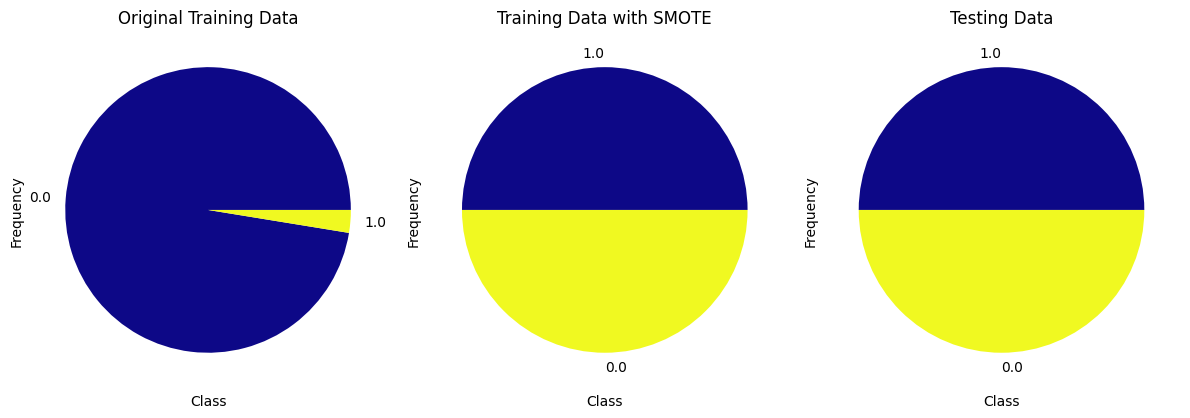

In [31]:
import matplotlib.pyplot as plt
df_training = pd.read_csv('training_data.csv')
df_test = pd.read_csv('testing_data.csv')

# Plot class distribution for original training data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
y.value_counts().plot(kind='pie', colormap="plasma" , title='Original Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Plot class distribution for resampled training data
plt.subplot(1, 3, 2)
y_resampled.value_counts().plot(kind='pie', colormap="plasma" , title='Training Data with SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Separate features and target variable for testing data
X_test = df_test.drop(columns=['y'])
y_test = df_test['y']

# Plot class distribution for testing data
plt.subplot(1, 3, 3)
y_test.value_counts().plot(kind='pie', colormap="plasma" , title='Testing Data')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Save the Resampled Dataset
Finally, we save the resampled dataset to a new CSV file.

In [30]:
df_resampled.to_csv('training_balanced_smote.csv', index=False)